## **Drive Mounting**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Unziping the file into given folder in drive**(DONT RUN THIS CELL)

In [ ]:
# !unzip "/content/drive/MyDrive/Stanford40.zip" -d "/content/drive/MyDrive/Stanford_40"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_128.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_129.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_130.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_131.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_132.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_133.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_134.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_135.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_136.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_137.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotations/phoning_138.xml  
  inflating: /content/drive/MyDrive/Stanford_40/XMLAnnotat

## **Importing Libraries**

In [ ]:
import os,os.path,shutil
import tensorflow as tf
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121,DenseNet201
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
import urllib
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
!pip install livelossplot==0.5.2
from livelossplot import PlotLossesKeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00


## **Data Preprocessing**

Counting no of files


In [ ]:
dir_path = r'/content/drive/MyDrive/Stanford_40/JPEGImages'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 0


Data Augmentation


In [ ]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

Creating Dictionary of Classes

In [ ]:
rootdir='/content/drive/MyDrive/Stanford_40/JPEGImages'
def create_dict_of_actions():
    global actionDict
    actionDict = {}
    contents = []
    file = open("/content/drive/MyDrive/Stanford_40/ImageSplits/actions_only.txt", "r")
    i = 1
    if file.mode == 'r':
        fl = file.readlines()
        for f in fl:
            f = f.rstrip("\n")
            contents.append(f)
            actionDict[f] = i
            i += 1

        file.close()

create_dict_of_actions()
print(actionDict)
print(len(actionDict))


{'applauding': 1, 'blowing_bubbles': 2, 'brushing_teeth': 3, 'cleaning_the_floor': 4, 'climbing': 5, 'cooking': 6, 'cutting_trees': 7, 'cutting_vegetables': 8, 'drinking': 9, 'feeding_a_horse': 10, 'fishing': 11, 'fixing_a_bike': 12, 'fixing_a_car': 13, 'gardening': 14, 'holding_an_umbrella': 15, 'jumping': 16, 'looking_through_a_microscope': 17, 'looking_through_a_telescope': 18, 'playing_guitar': 19, 'playing_violin': 20, 'pouring_liquid': 21, 'pushing_a_cart': 22, 'reading': 23, 'phoning': 24, 'riding_a_bike': 25, 'riding_a_horse': 26, 'rowing_a_boat': 27, 'running': 28, 'shooting_an_arrow': 29, 'smoking': 30, 'taking_photos': 31, 'texting_message': 32, 'throwing_frisby': 33, 'using_a_computer': 34, 'walking_the_dog': 35, 'washing_dishes': 36, 'watching_TV': 37, 'waving_hands': 38, 'writing_on_a_board': 39, 'writing_on_a_book': 40}
40


Segrating Classes into SubFolders (DONT RUN THIS CELL)

In [ ]:
# images = [f for f in os.listdir(rootdir) if os.path.isfile(os.path.join(rootdir, f))]

# for image in images:
#     name = image.split('_')
#     folder_name=""
#     i=0
#     for i in range(len(name)):
#       if(i==len(name)-1):
#         break
#       if(i==len(name)-2):
#         folder_name=folder_name+name[i]
#       else:
#         folder_name=folder_name+name[i]+"_"

#     new_path = os.path.join('/content/drive/MyDrive/Dl_Datasets/Stanford_40/data', folder_name)
#     if not os.path.exists(new_path):
#         print(folder_name)
#         os.makedirs(new_path)

#     old_image_path = os.path.join(rootdir, image)
#     new_image_path = os.path.join(new_path, image)
#     shutil.move(old_image_path, new_image_path)

Creating Train Test and Val folders under Data (DONT RUN THIS CELL)

In [ ]:
# rootdir='/content/drive/MyDrive/Dl_Datasets/Stanford_40/data'
# for i in actionDict:
#   os.makedirs(rootdir +'/train/' + i)
#   os.makedirs(rootdir +'/val/' + i)
#   os.makedirs(rootdir +'/test/' + i)
#   src = os.path.join(rootdir, i)

#   allFileNames = os.listdir(src)
#   np.random.shuffle(allFileNames)

#   # val_ratio = 0.15
#   test_ratio = 0.1

#   # train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#   #                                                         [int(len(allFileNames)* (1 - (val_ratio + test_ratio))),
#   #                                                          int(len(allFileNames)* (1 - test_ratio))])

#   train_FileNames,test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - test_ratio))])


#   train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#   # val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#   test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
#   print(i)
#   print('Total images: ', len(allFileNames))
#   print('Training: ', len(train_FileNames))
#   # print('Validation: ', len(val_FileNames))
#   print('Testing: ', len(test_FileNames))
#   print("\n")

#   # Copy-pasting images
#   for name in train_FileNames:
#     shutil.copy(name, rootdir +'/train/' + i)

#   # for name in val_FileNames:
#   #   shutil.copy(name, rootdir +'/val/' + i)

#   for name in test_FileNames:
#     shutil.copy(name, rootdir +'/test/' + i)

## **Image directory flow from GDrive**

In [ ]:
# download_dir = Path('/content/drive/MyDrive/Stanford_40/JPEGImages')

In [ ]:
# class_subset = sorted(os.listdir(download_dir))
# print(class_subset)

In [ ]:
train_data_dir = '/content/drive/MyDrive/Dl_Datasets/Stanford_40/data/train'
test_data_dir = '/content/drive/MyDrive/Dl_Datasets/Stanford_40/data/test'


traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)


Found 7296 images belonging to 40 classes.
Found 1264 images belonging to 40 classes.
Found 972 images belonging to 40 classes.


# **CNN MODELS**

### **VGG-16**

In [ ]:
def create_model_VGG16(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model_VGG16(input_shape, n_classes, optim_1, fine_tune=0)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/vgg16.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

#### **RUN 1**

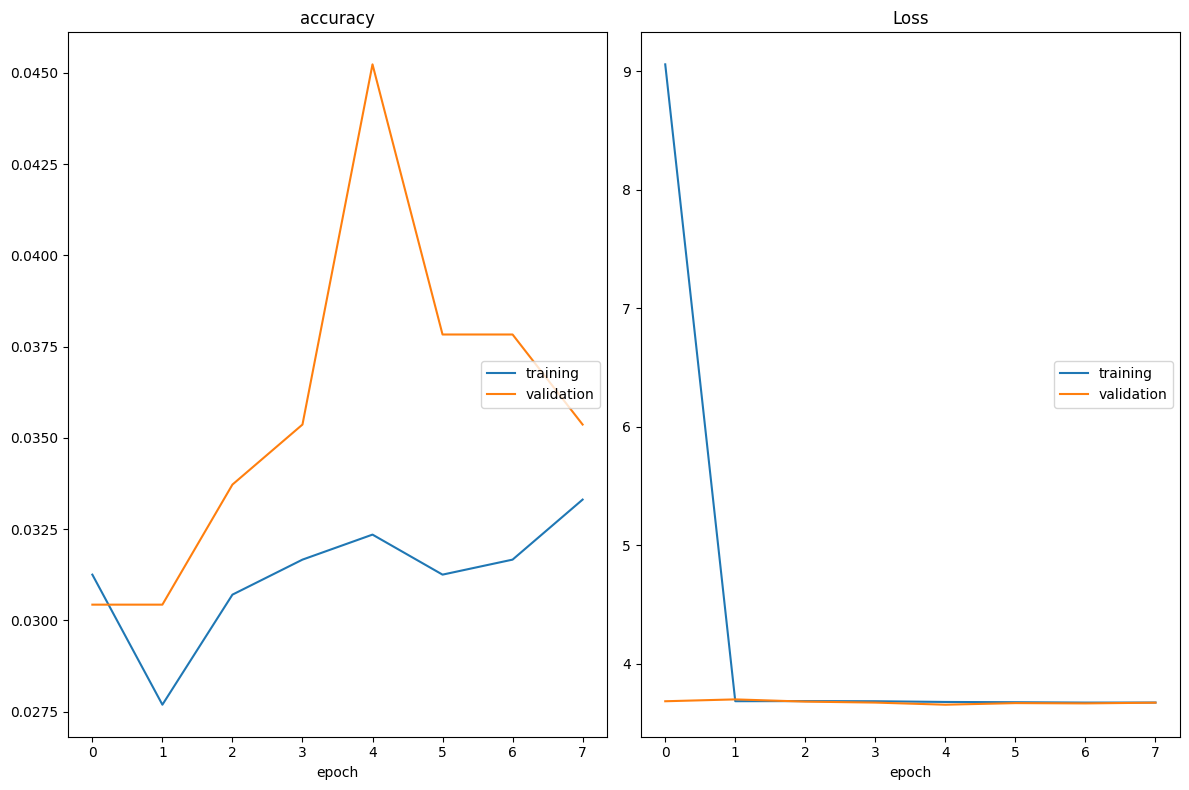

accuracy
	training         	 (min:    0.028, max:    0.033, cur:    0.033)
	validation       	 (min:    0.030, max:    0.045, cur:    0.035)
Loss
	training         	 (min:    3.673, max:    9.059, cur:    3.673)
	validation       	 (min:    3.655, max:    3.700, cur:    3.672)
114/114 [==============================] - 181s 2s/step - loss: 3.6733 - accuracy: 0.0333 - val_loss: 3.6720 - val_accuracy: 0.0354
Epoch 9/50
 96/114 [========================>.....] - ETA: 21s - loss: 3.6693 - accuracy: 0.0348

KeyboardInterrupt: ignored

In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
vgg_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/vgg16.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

972/972 [==============================] - 11s 11ms/step


In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 5.35%


#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model_VGG16(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

Epoch 1/50
114/114 [==============================] - ETA: 0s - loss: 5.4273 - accuracy: 0.0528 

In [ ]:
# Generate predictions
vgg_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/vgg16.weights.best.hdf5') # initialize the best trained weights

vgg_preds_ft = vgg_model_ft.predict(testgen)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)


In [ ]:
vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)
print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc_ft * 100))

### **VGG-19**

In [ ]:
def create_model_VGG19(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG19 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG19(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model_VGG19(input_shape, n_classes, optim_1, fine_tune=0)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/vgg19.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

#### **RUN 1**

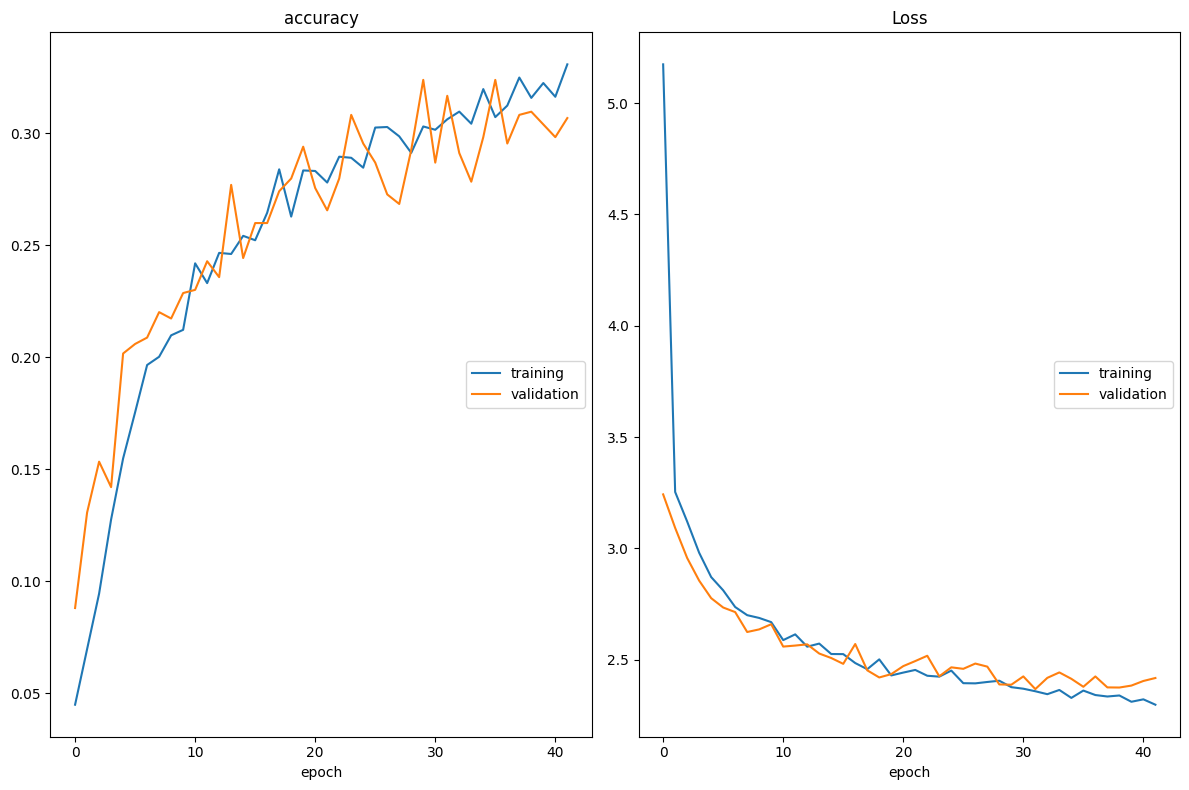

accuracy
	training         	 (min:    0.045, max:    0.331, cur:    0.331)
	validation       	 (min:    0.088, max:    0.324, cur:    0.307)
Loss
	training         	 (min:    2.298, max:    5.174, cur:    2.298)
	validation       	 (min:    2.368, max:    3.242, cur:    2.417)
64/64 [==============================] - 100s 2s/step - loss: 2.2975 - accuracy: 0.3308 - val_loss: 2.4175 - val_accuracy: 0.3068
CPU times: user 1h 4min 3s, sys: 4min 26s, total: 1h 8min 30s
Wall time: 2h 10min 31s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
vgg_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/vgg19.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

629/629 [==============================] - 139s 209ms/step


In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG19 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG19 Model Accuracy without Fine-Tuning: 48.81%


#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model_VGG19(input_shape, n_classes, optim_2, fine_tune=2)

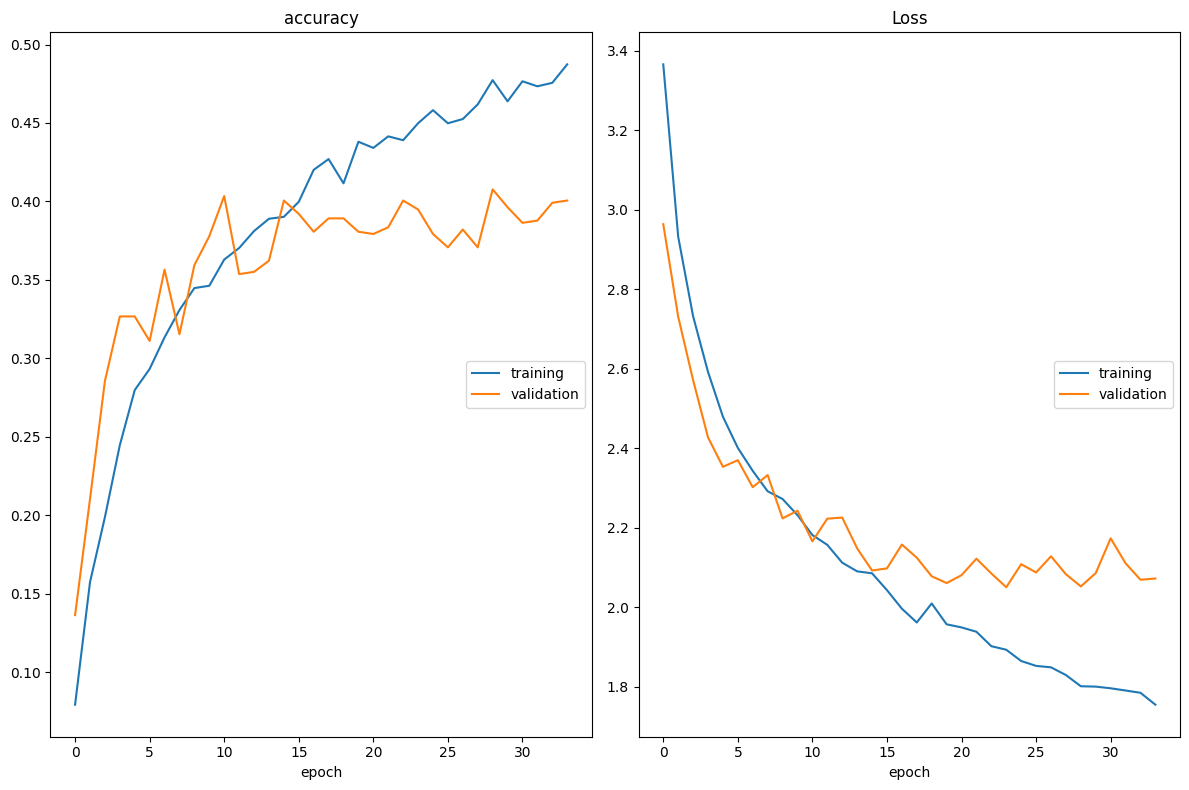

accuracy
	training         	 (min:    0.079, max:    0.487, cur:    0.487)
	validation       	 (min:    0.136, max:    0.408, cur:    0.401)
Loss
	training         	 (min:    1.755, max:    3.366, cur:    1.755)
	validation       	 (min:    2.051, max:    2.964, cur:    2.073)
64/64 [==============================] - 103s 2s/step - loss: 1.7552 - accuracy: 0.4874 - val_loss: 2.0725 - val_accuracy: 0.4006
CPU times: user 52min 28s, sys: 3min 37s, total: 56min 6s
Wall time: 1h 24min 32s


In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
vgg_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/vgg19.weights.best.hdf5') # initialize the best trained weights

vgg_preds_ft = vgg_model_ft.predict(testgen)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)


629/629 [==============================] - 9s 14ms/step


In [ ]:
vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)
print("VGG19 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc_ft * 100))

VGG19 Model Accuracy with Fine-Tuning: 65.98%


### **RESNET-50**


In [ ]:
def create_model_ResNet50(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with ResNet50 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = ResNet50(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
resnet_model = create_model_ResNet50(input_shape, n_classes, optim_1, fine_tune=0)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/resnet50.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

#### **RUN 1**

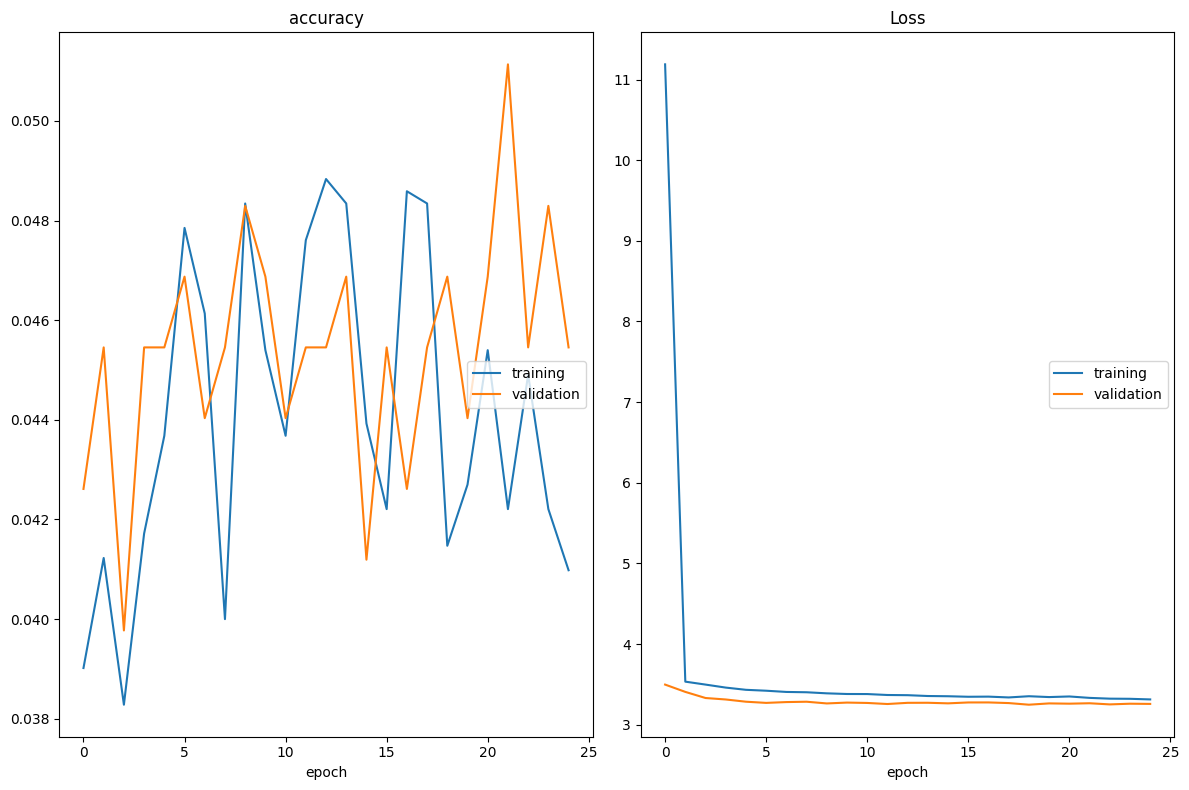

accuracy
	training         	 (min:    0.038, max:    0.049, cur:    0.041)
	validation       	 (min:    0.040, max:    0.051, cur:    0.045)
Loss
	training         	 (min:    3.313, max:   11.188, cur:    3.313)
	validation       	 (min:    3.248, max:    3.497, cur:    3.258)
64/64 [==============================] - 99s 2s/step - loss: 3.3134 - accuracy: 0.0410 - val_loss: 3.2578 - val_accuracy: 0.0455
Epoch 26/50
47/64 [=====================>........] - ETA: 20s - loss: 3.3132 - accuracy: 0.0435

In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

resnet_history = resnet_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
resnet_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/resnet50.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

resnet_preds = resnet_model.predict(testgen)
resnet_pred_classes = np.argmax(resnet_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

resnet_acc = accuracy_score(true_classes, resnet_pred_classes)
print("ResNet50 Model Accuracy without Fine-Tuning: {:.2f}%".format(resnet_acc * 100))

#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
resnet_model_ft = create_model_ResNet50(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
resnet_ft_history = resnet_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
resnet_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/resnet50.weights.best.hdf5') # initialize the best trained weights

resnet_preds_ft = resnet_model_ft.predict(testgen)
resnet_pred_classes_ft = np.argmax(resnet_preds_ft, axis=1)

In [ ]:
resnet_acc_ft = accuracy_score(true_classes, resnet_pred_classes_ft)
print("ResNet50 Model Accuracy with Fine-Tuning: {:.2f}%".format(resnet_acc_ft * 100))

### **RESNET-101**


In [ ]:
def create_model_ResNet101(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with ResNet101 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = ResNet101(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
resnet101_model = create_model_ResNet101(input_shape, n_classes, optim_1, fine_tune=0)

171446536/171446536 [==============================] - 2s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/resnet101.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

#### **RUN 1**

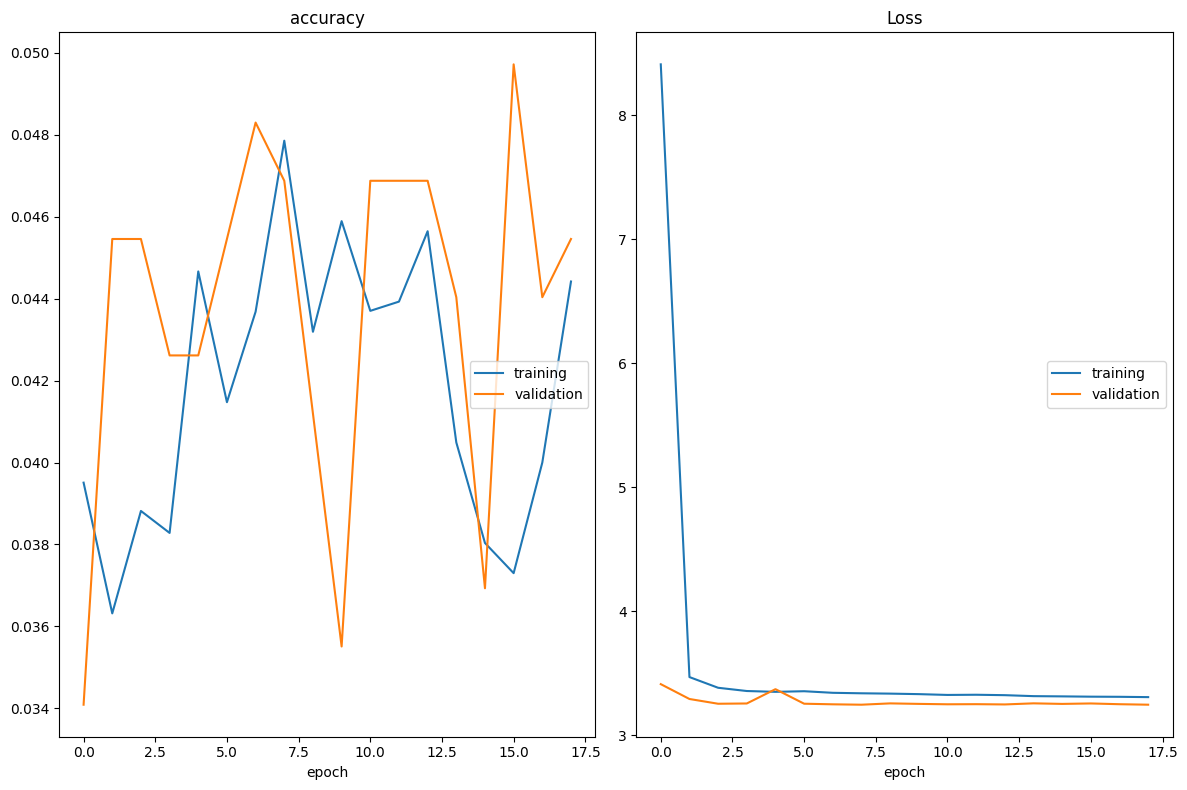

accuracy
	training         	 (min:    0.036, max:    0.048, cur:    0.044)
	validation       	 (min:    0.034, max:    0.050, cur:    0.045)
Loss
	training         	 (min:    3.309, max:    8.411, cur:    3.309)
	validation       	 (min:    3.247, max:    3.413, cur:    3.248)
64/64 [==============================] - 96s 2s/step - loss: 3.3086 - accuracy: 0.0444 - val_loss: 3.2475 - val_accuracy: 0.0455
CPU times: user 28min 40s, sys: 2min 53s, total: 31min 34s
Wall time: 1h 25min 7s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

resnet101_history = resnet101_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
resnet101_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/resnet101.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

resnet101_preds = resnet101_model.predict(testgen)
resnet101_pred_classes = np.argmax(resnet101_preds, axis=1)

629/629 [==============================] - 394s 623ms/step


In [ ]:
from sklearn.metrics import accuracy_score

resnet101_acc = accuracy_score(true_classes, resnet101_pred_classes)
print("ResNet101 Model Accuracy without Fine-Tuning: {:.2f}%".format(resnet101_acc * 100))

ResNet101 Model Accuracy without Fine-Tuning: 0.64%


#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
resnet101_model_ft = create_model_ResNet101(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
resnet101_ft_history = resnet101_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
resnet101_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/resnet101.weights.best.hdf5') # initialize the best trained weights

resnet101_preds_ft = resnet101_model_ft.predict(testgen)
resnet101_pred_classes_ft = np.argmax(resnet101_preds_ft, axis=1)

In [ ]:
resnet101_acc_ft = accuracy_score(true_classes, resnet101_pred_classes_ft)
print("ResNet101 Model Accuracy with Fine-Tuning: {:.2f}%".format(resnet101_acc_ft * 100))

### **INCEPTION V3**

In [ ]:
def create_model_Inception(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = InceptionV3(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
inception_model = create_model_Inception(input_shape, n_classes, optim_1, fine_tune=0)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='inceptionv3.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.7 MB/s eta 0:00:00


#### **RUN 1**

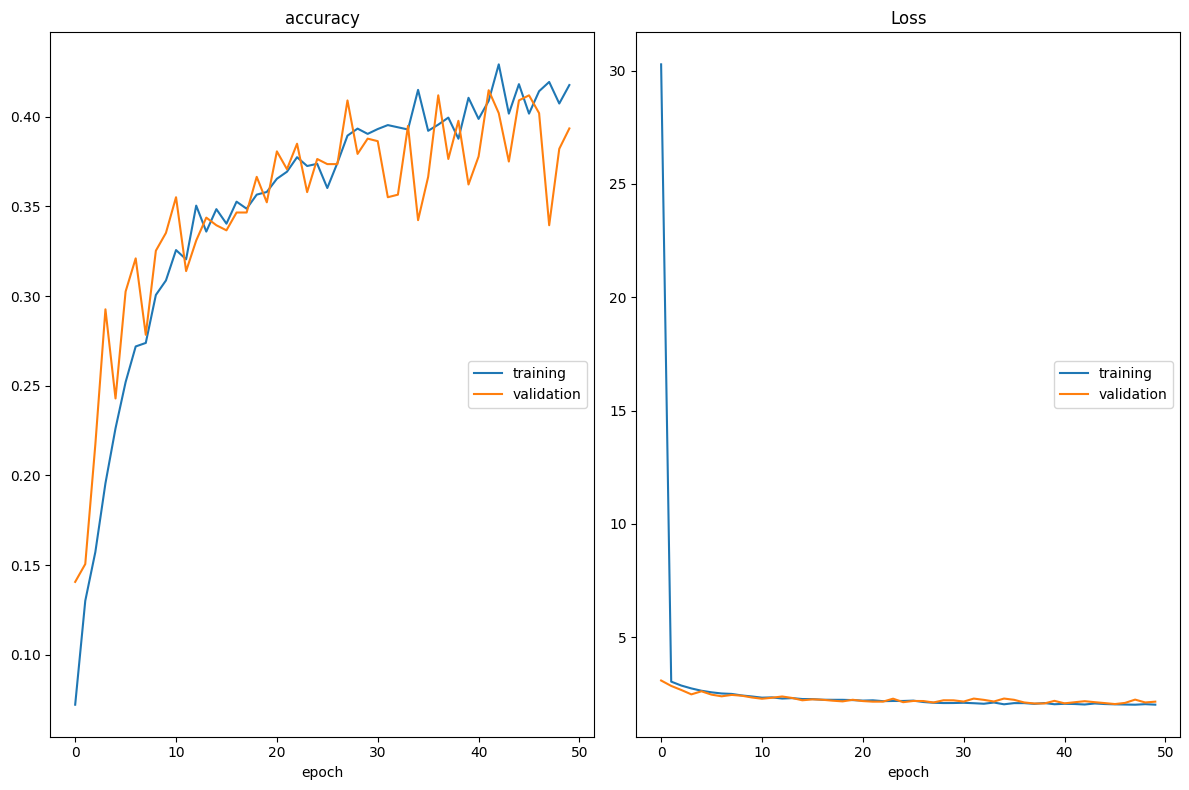

accuracy
	training         	 (min:    0.072, max:    0.429, cur:    0.418)
	validation       	 (min:    0.141, max:    0.415, cur:    0.393)
Loss
	training         	 (min:    2.027, max:   30.273, cur:    2.029)
	validation       	 (min:    2.055, max:    3.094, cur:    2.161)
64/64 [==============================] - 96s 2s/step - loss: 2.0286 - accuracy: 0.4177 - val_loss: 2.1609 - val_accuracy: 0.3935
CPU times: user 1h 12min 23s, sys: 5min 45s, total: 1h 18min 9s
Wall time: 1h 53min 26s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

inception_history = inception_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
inception_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/inceptionv3.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

inception_preds = inception_model.predict(testgen)
inception_pred_classes = np.argmax(inception_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

inception_acc = accuracy_score(true_classes, inception_pred_classes)
print("Inceptionv3 Model Accuracy without Fine-Tuning: {:.2f}%".format(inception_acc * 100))

#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
inception_model_ft = create_model_Inception(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
inception_ft_history = inception_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
inception_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/inceptionv3.weights.best.hdf5') # initialize the best trained weights

inception_preds_ft = inception_model_ft.predict(testgen)
inception_pred_classes_ft = np.argmax(inception_preds_ft, axis=1)

In [ ]:
inception_acc_ft = accuracy_score(true_classes, inception_pred_classes_ft)
print("Inceptionv3 Model Accuracy with Fine-Tuning: {:.2f}%".format(inception_acc_ft * 100))

### **MOBILENET V2**


In [ ]:
def create_model_MobileNet(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with ResNet50 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = MobileNetV2(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
mobilenet_model = create_model_MobileNet(input_shape, n_classes, optim_1, fine_tune=0)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/mobilenetv2.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

#### **RUN 1**

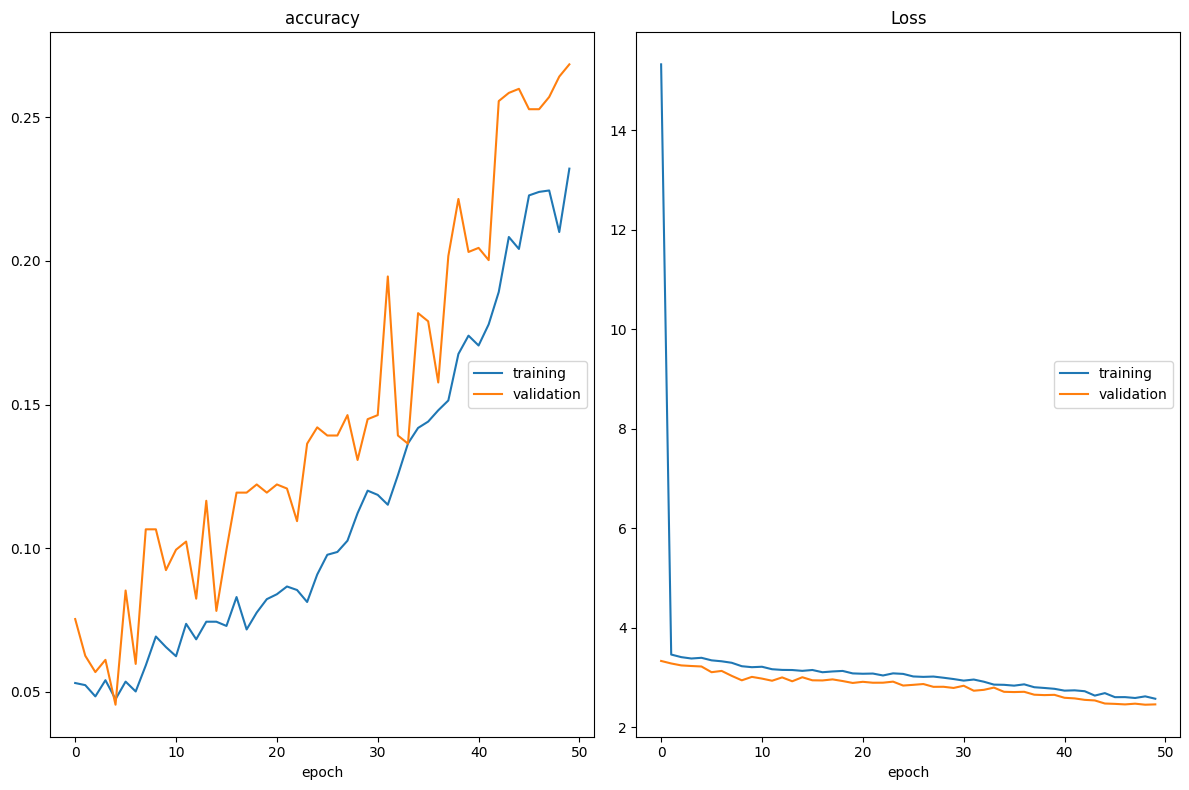

accuracy
	training         	 (min:    0.047, max:    0.232, cur:    0.232)
	validation       	 (min:    0.045, max:    0.268, cur:    0.268)
Loss
	training         	 (min:    2.577, max:   15.321, cur:    2.577)
	validation       	 (min:    2.457, max:    3.336, cur:    2.463)
64/64 [==============================] - 111s 2s/step - loss: 2.5769 - accuracy: 0.2321 - val_loss: 2.4634 - val_accuracy: 0.2685
CPU times: user 1h 14min 4s, sys: 7min 49s, total: 1h 21min 54s
Wall time: 2h 37min 28s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

mobilenet_history = mobilenet_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
mobilenet_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/mobilenetv2.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

mobilenet_preds = mobilenet_model.predict(testgen)
mobilenet_pred_classes = np.argmax(mobilenet_preds, axis=1)

629/629 [==============================] - 388s 603ms/step


In [ ]:
from sklearn.metrics import accuracy_score

mobilenet_acc = accuracy_score(true_classes, mobilenet_pred_classes)
print("MobileNetv2 Model Accuracy without Fine-Tuning: {:.2f}%".format(mobilenet_acc * 100))

MobileNetv2 Model Accuracy without Fine-Tuning: 71.07%


#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
mobilenet_model_ft = create_model_MobileNet(input_shape, n_classes, optim_2, fine_tune=2)

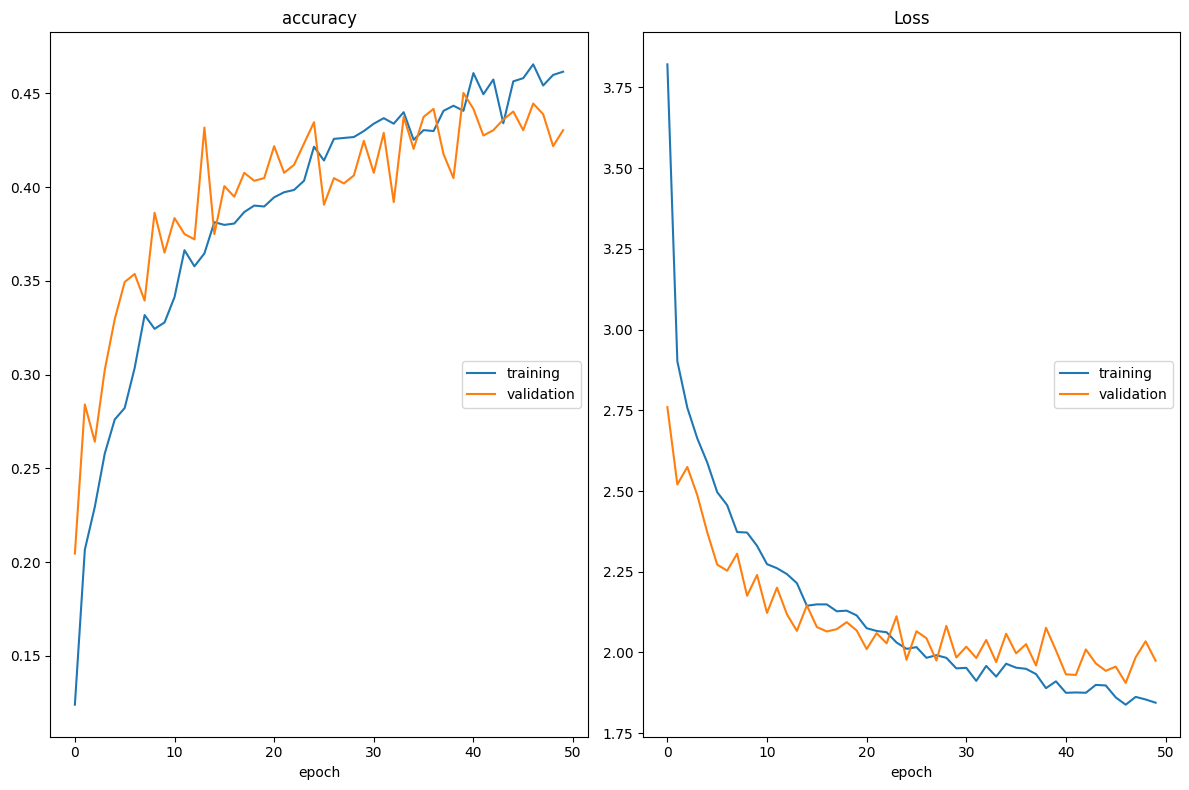

accuracy
	training         	 (min:    0.124, max:    0.466, cur:    0.462)
	validation       	 (min:    0.205, max:    0.450, cur:    0.430)
Loss
	training         	 (min:    1.838, max:    3.822, cur:    1.845)
	validation       	 (min:    1.906, max:    2.760, cur:    1.974)
64/64 [==============================] - 92s 1s/step - loss: 1.8445 - accuracy: 0.4616 - val_loss: 1.9745 - val_accuracy: 0.4304
CPU times: user 1h 15min 1s, sys: 7min 1s, total: 1h 22min 2s
Wall time: 2h 37min 49s


In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
mobilenet_ft_history = mobilenet_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
mobilenet_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/mobilenetv2.weights.best.hdf5') # initialize the best trained weights

mobilenet_preds_ft = mobilenet_model_ft.predict(testgen)
mobilenet_pred_classes_ft = np.argmax(mobilenet_preds_ft, axis=1)

629/629 [==============================] - 8s 11ms/step


In [ ]:
mobilenet_acc_ft = accuracy_score(true_classes, mobilenet_pred_classes_ft)
print("MobileNetv2 Model Accuracy with Fine-Tuning: {:.2f}%".format(mobilenet_acc_ft * 100))

### **DENSENET 121**

In [ ]:
def create_model_Densenet(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = DenseNet121(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
densenet_model = create_model_Densenet(input_shape, n_classes, optim_1, fine_tune=0)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/densenet121.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **RUN 1**

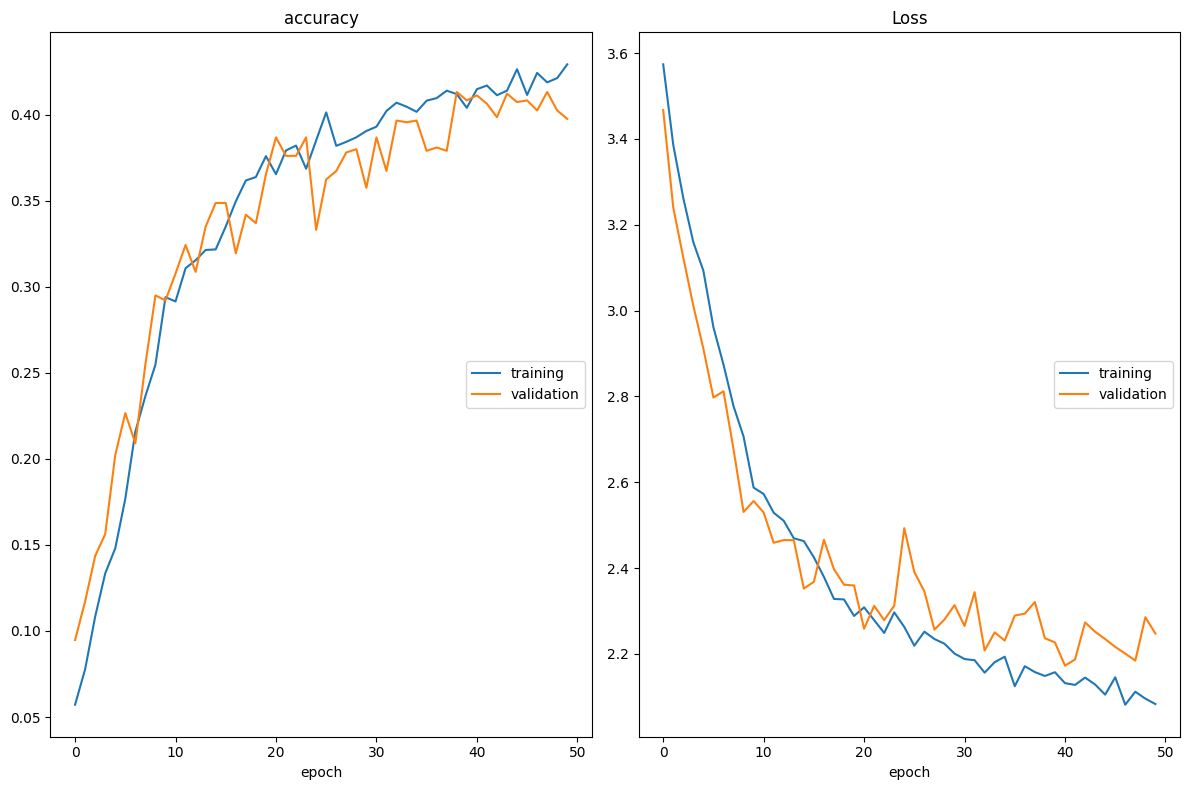

accuracy
	training         	 (min:    0.057, max:    0.429, cur:    0.429)
	validation       	 (min:    0.095, max:    0.413, cur:    0.397)
Loss
	training         	 (min:    2.081, max:    3.574, cur:    2.083)
	validation       	 (min:    2.172, max:    3.467, cur:    2.247)
95/95 [==============================] - 155s 2s/step - loss: 2.0830 - accuracy: 0.4291 - val_loss: 2.2474 - val_accuracy: 0.3975
CPU times: user 1h 44min 53s, sys: 7min 14s, total: 1h 52min 7s
Wall time: 2h 12min 34s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

densenet_history = densenet_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
inception_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/densenet121.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

densenet_preds = densenet_model.predict(testgen)
densenet_pred_classes = np.argmax(densenet_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

densenet_acc = accuracy_score(true_classes, densenet_pred_classes)
print("DenseNet121 Model Accuracy without Fine-Tuning: {:.2f}%".format(densenet_acc * 100))

#### **RUN 2**

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
densenet_model_ft = create_model_Inception(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
densenet_ft_history = densenet_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
densenet_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/densenet121.weights.best.hdf5') # initialize the best trained weights

densenet_preds_ft = densenet_model_ft.predict(testgen)
densenet_pred_classes_ft = np.argmax(densenet_preds_ft, axis=1)

In [ ]:
densenet_acc_ft = accuracy_score(true_classes, densenet_pred_classes_ft)
print("Inceptionv3 Model Accuracy with Fine-Tuning: {:.2f}%".format(densenet_acc_ft * 100))

### **DENSENET 201**


In [ ]:
def create_model_Densenet(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = DenseNet201(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
 # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=40

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
densenet_model = create_model_Densenet(input_shape, n_classes, optim_1, fine_tune=0)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/stanford_40_saved_models/densenet121.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


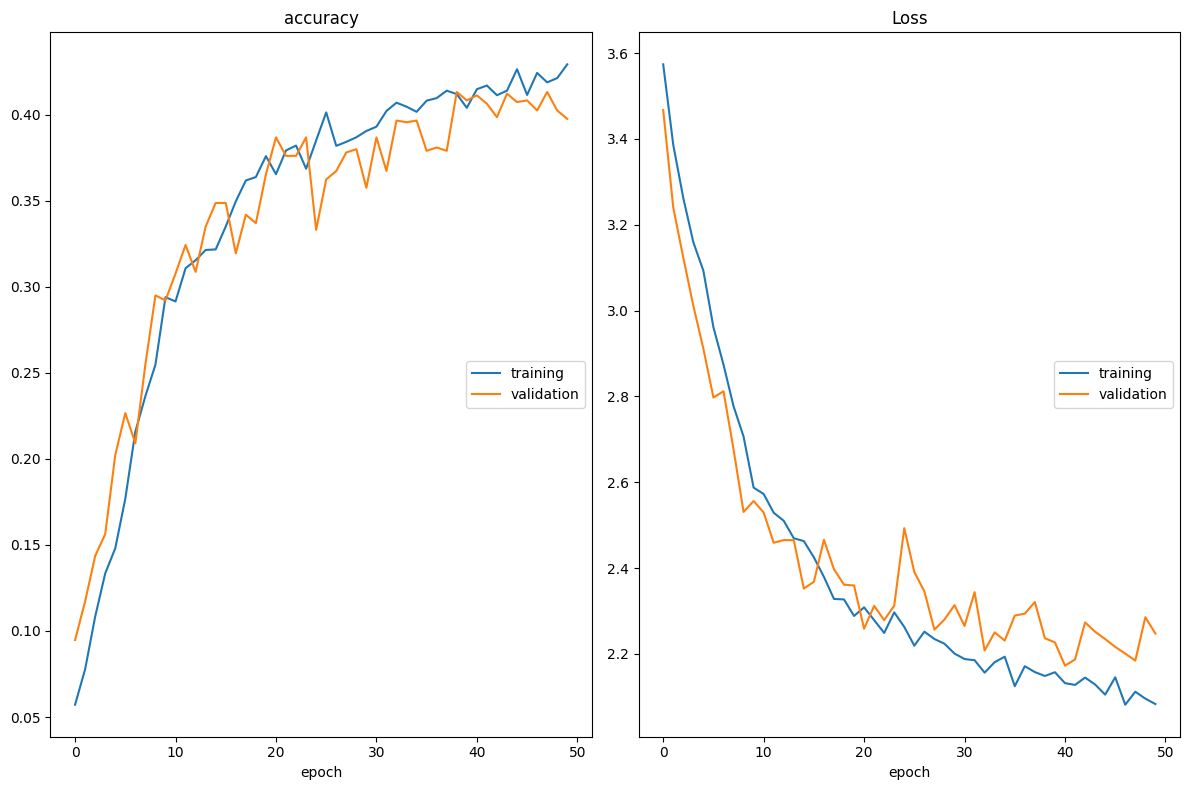

accuracy
	training         	 (min:    0.057, max:    0.429, cur:    0.429)
	validation       	 (min:    0.095, max:    0.413, cur:    0.397)
Loss
	training         	 (min:    2.081, max:    3.574, cur:    2.083)
	validation       	 (min:    2.172, max:    3.467, cur:    2.247)
95/95 [==============================] - 155s 2s/step - loss: 2.0830 - accuracy: 0.4291 - val_loss: 2.2474 - val_accuracy: 0.3975
CPU times: user 1h 44min 53s, sys: 7min 14s, total: 1h 52min 7s
Wall time: 2h 12min 34s


In [ ]:
%%time

plot_loss_1 = PlotLossesKeras()

densenet_history = densenet_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
inception_model.load_weights('/content/drive/MyDrive/stanford_40_saved_models/densenet121.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

densenet_preds = densenet_model.predict(testgen)
densenet_pred_classes = np.argmax(densenet_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

densenet_acc = accuracy_score(true_classes, densenet_pred_classes)
print("DenseNet121 Model Accuracy without Fine-Tuning: {:.2f}%".format(densenet_acc * 100))

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
densenet_model_ft = create_model_Inception(input_shape, n_classes, optim_2, fine_tune=2)

In [ ]:
%%time

plot_loss_2 = PlotLossesKeras()

# Retrain model with fine-tuning
densenet_ft_history = densenet_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
# Generate predictions
densenet_model_ft.load_weights('/content/drive/MyDrive/stanford_40_saved_models/inceptionv3.weights.best.hdf5') # initialize the best trained weights

densenet_preds_ft = densenet_model_ft.predict(testgen)
densenet_pred_classes_ft = np.argmax(densenet_preds_ft, axis=1)

In [ ]:
densenet_acc_ft = accuracy_score(true_classes, densenet_pred_classes_ft)
print("Inceptionv3 Model Accuracy with Fine-Tuning: {:.2f}%".format(densenet_acc_ft * 100))